Follow the example from the previous notebook Linear Regression using SGD and build a loop that properly finds the centers of these 4 clusters using k-means.

(400, 2) (400,) (4, 2)


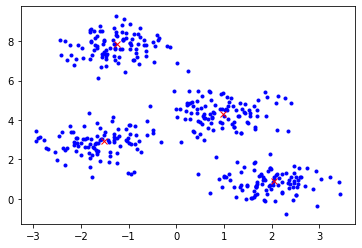

In [1]:
# Code from class

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import time
import IPython.display as ipydis

# For reproducibility, I set the random seed

np.random.seed(234)

npoints = 400
N = 4
x, cluster_labels, cluster_centers = make_blobs(n_samples=npoints, centers=N,
                       cluster_std=0.60, random_state=0,
                       return_centers=True)
print(x.shape,cluster_labels.shape,cluster_centers.shape)
plt.plot(x[:, 0], x[:, 1],'b.')
plt.plot(cluster_centers[:,0],cluster_centers[:,1],'rx')

def initialize_centroids(x,N):
   x_indices = np.random.choice(np.arange(0,x.shape[0]),N)
   centroids = x[x_indices]
   return centroids

def get_new_centroids(x, labels, N):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([x[labels==k].mean(axis=0) for k in range(N)])

# distance is sqrt( (x - x')**2 + (y - y')**2 )
def assign_labels(x,c):
   # centroids are shape [N,2]
   # x are shape [npoints,2]
   # add middle index to centroids to properly broadcast in math operations
   c = c[:,np.newaxis,:] # [N,1,2]
   
   # calculate (x - x')**2 and (y - y')**2
   # x is shape [npoints,2], c is [N,1,2] results in an array of shape: [N,npoints,2]
   dist2 = (x - c)**2
   
   # calculate (x - x')**2 + (y - y')**2
   dist2 = dist2.sum(axis=2) # [N,npoints]
   
   # out of the N distances, return the index (0-(N-1)) of the one that is the minimum.
   label = np.argmin(dist2,axis=0) # [npoints]

   return label



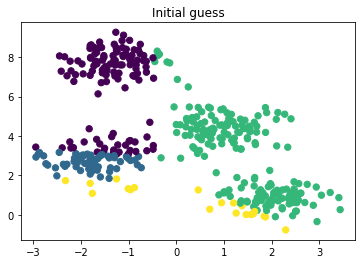

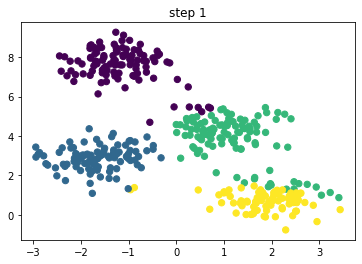

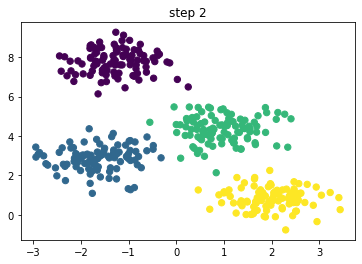

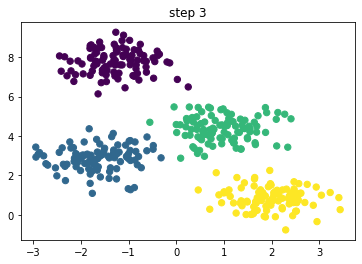

point labels unchanged as of step 3


In [2]:
# HW part

# We need to create a loop that continues until one of the following happens:
# 1. centroids no longer shift more than some defined distance (delta)
# 2. no points change their label
# 3. some predefined iteration max is reached

# Initialization

delta = 0.01
last_centroids = initialize_centroids(x,N)
last_labels = assign_labels(x,last_centroids)
step = 0
plt.scatter(x[:, 0], x[:, 1], c=last_labels, s=40, cmap='viridis')
plt.title('Initial guess')
plt.show()
time.sleep(1)
#ipydis.clear_output(wait=True)

# Set hyperparameters

max_iter = 1000

for i in range(1, max_iter):
  centroids = get_new_centroids(x,last_labels,N)
  labels = assign_labels(x,centroids)

  # test if centroids have stopped moving
  if np.all((last_centroids - centroids) < delta):
    print('=' * 50)
    print('centroids unchanged as of step %d' % (i-1))
    print('=' * 50)
    break
  elif np.all(labels == last_labels):
    print('=' * 50)
    print('point labels unchanged as of step %d' % (i-1))
    print('=' * 50)
    break
  else:
    last_labels = labels
    last_centroids = centroids

  plt.scatter(x[:, 0], x[:, 1], c=last_labels, s=40, cmap='viridis')
  plt.title('step %d' % i)
  plt.show()